# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

# Toy data set

## Load and generate data

In [2]:
data = loadmat('datasets/toydata.mat')
A = np.array(data["A"])
B = np.array(data["B"])
C = np.array([[1,1],[3,2]])

XX = base.ktensor(A,B,C)

## Find parafac decomposition with cp_opt

In [3]:
factors, result,_ = cp.cp_opt(XX, rank=2, init='random', gtol=1e-15)

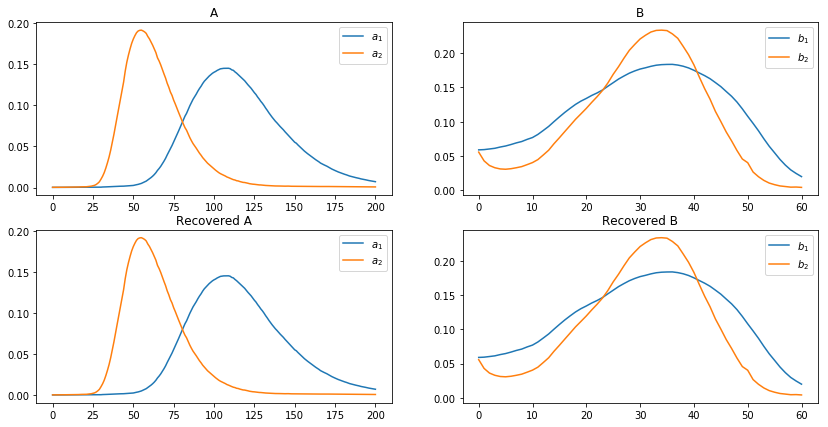

In [4]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(2,2,figsize=(14,7))
axes[0,0].plot(A)
axes[0,1].plot(B)

axes[0,0].set_title("A")
axes[0,1].set_title("B")
axes[0,0].legend(["$a_1$", "$a_2$"])
axes[0,1].legend(["$b_1$", "$b_2$"])

axes[1,0].plot(factors[0])
axes[1,1].plot(factors[1]) 

axes[1,0].set_title("Recovered A")
axes[1,1].set_title("Recovered B")
axes[1,0].legend(["$a_1$", "$a_2$"])
axes[1,1].legend(["$b_1$", "$b_2$"])
plt.show()

# Aminoacid dataset

## Load data

In [5]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)

## Find parafac decomposition with cp_opt

In [23]:
factors, result, initial_factors = cp.cp_opt(X, rank=3, init='svd', gtol=1e-5)

In [24]:
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Optimization terminated successfully.
F(x): 0.0003137312420869495
Number of iterations: 104
Number of function evaluations: 191


In [25]:
print(result)

     fun: 0.0003137170913725436
     jac: array([-4.29349885e-07,  5.93378212e-07, -2.82371009e-06, -1.61100936e-06,
        3.06290972e-06,  5.28383418e-06,  1.79844786e-06, -5.91836669e-06,
        7.52335915e-06,  1.92274528e-06,  8.96752216e-07,  6.42414865e-06,
       -1.22706411e-06, -4.37521624e-06, -2.58964791e-06, -2.10602147e-07,
        3.93125133e-08, -5.53062034e-08, -2.11365354e-07,  3.96741096e-08,
       -5.50097986e-08, -2.20229968e-07,  4.38104005e-08, -5.74572474e-08,
       -1.96157170e-07,  4.36711463e-08, -5.07934544e-08, -2.03168795e-07,
        4.38665881e-08, -5.20526224e-08, -1.97725127e-07,  4.27509406e-08,
       -4.86394892e-08, -2.11773887e-07,  4.50433901e-08, -4.96564578e-08,
       -1.80924965e-07,  3.82554699e-08, -3.96204084e-08, -1.87883131e-07,
        3.12649562e-08, -3.79263470e-08, -2.49152905e-07,  2.78569425e-08,
       -4.92714587e-08, -2.33119855e-07,  7.16183569e-09, -3.94763572e-08,
       -2.64848839e-07, -1.74371912e-08, -3.83471353e-08, 

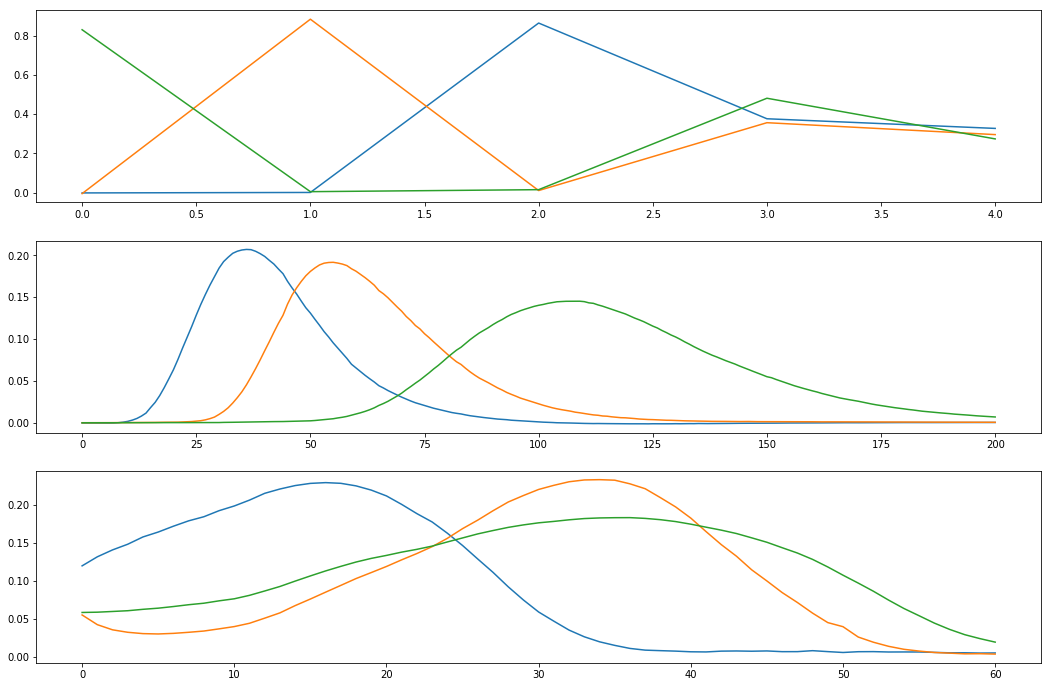

In [26]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(factors[i])
plt.show()

## Let's plot the initialization

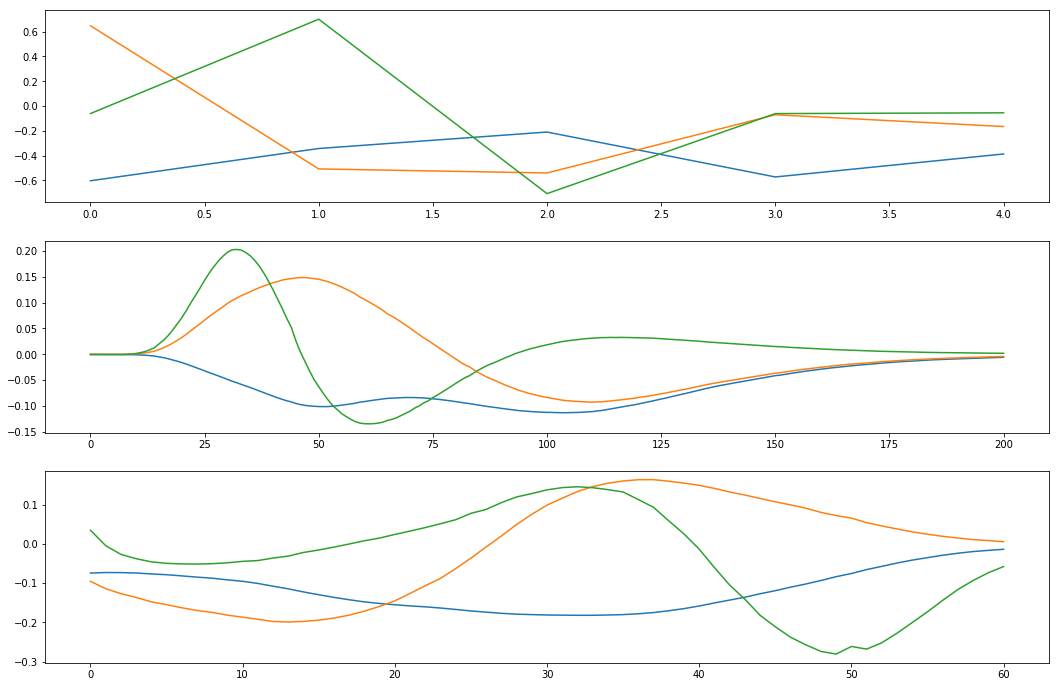

In [27]:
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(initial_factors[i])
plt.show()

## What happens when we look for wrong amount of  factors?

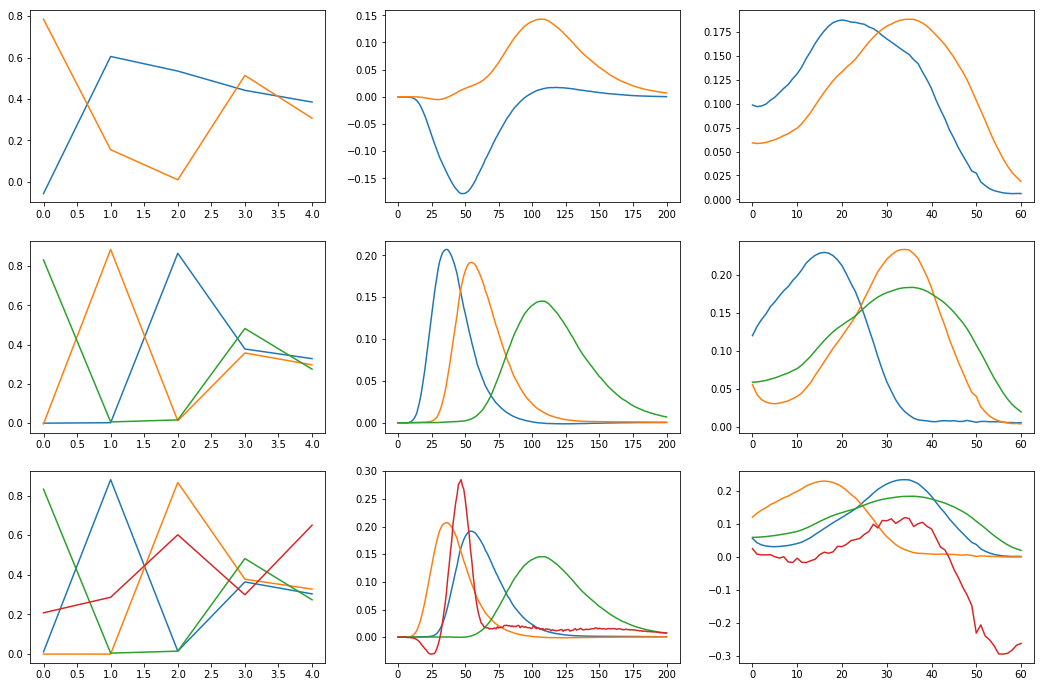

In [28]:
rank_list = [2,3,4]

fig, axes = plt.subplots(len(rank_list), 3, figsize=(18,12))
    
for i, rank in enumerate(rank_list):
    factors_unnorm, result,_ = cp.cp_opt(X, rank=rank, init='svd', gtol=1e-10)
    factors, sign, norms = cp.prepare_for_comparison(factors_unnorm)
    for j in range(3):
        axes[i][j].plot(factors[j])
        
plt.show()

## We can look at the weights of each component in the four component model

In [29]:
weights = np.prod(norms,axis=0).squeeze()

for i,w in enumerate(weights):
    print(f'Component {i:d} has weight {w:.2f}')

Component 0 has weight 0.49
Component 1 has weight 0.44
Component 2 has weight 0.70
Component 3 has weight 0.02
